# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [ ]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print dataset
print(dataset)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
# Print dataset shape
dataset.shape


(150, 5)

In [ ]:
# Print column names
print(dataset.columns)


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [ ]:
# Drop na
dataset.dropna(inplace=True)


3. Encoding the class label categorical column: from string to num


In [ ]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
label_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset["Flower"] = dataset["Flower"].map(label_mapping)

#Visualize the dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# Drop out non necesary columns
# Se asumira que todas las columnas son utiles
print(dataset.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


5. Scatter plot of the data

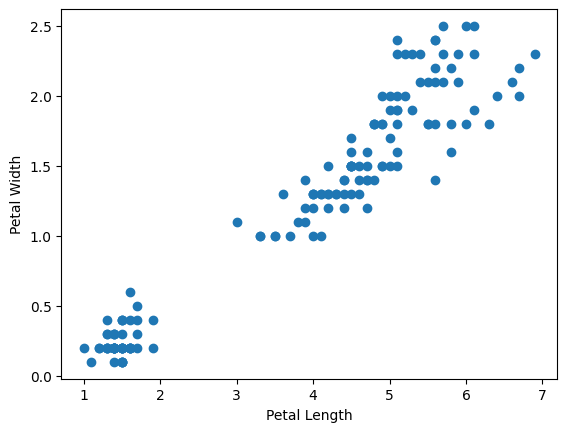

In [ ]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

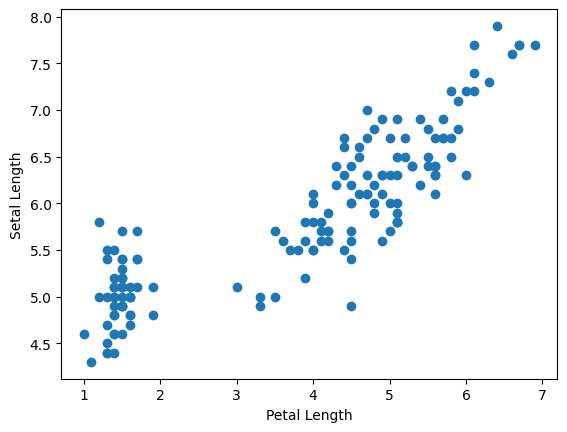

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Setal Length')
plt.show()

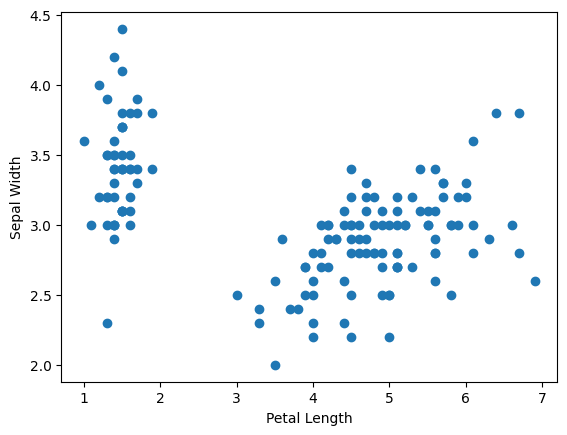

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()

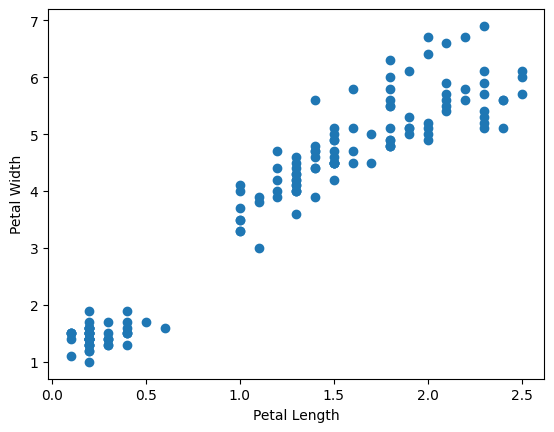

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Petal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

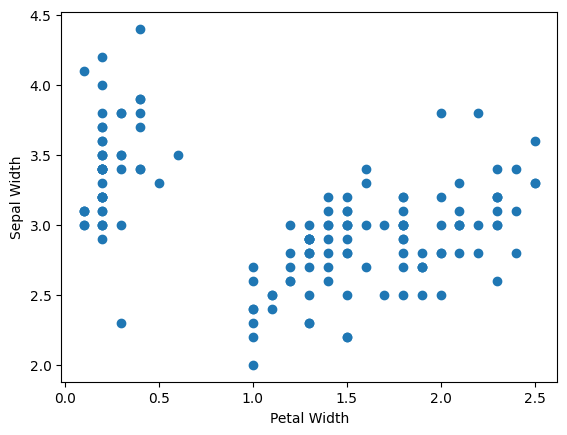

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()

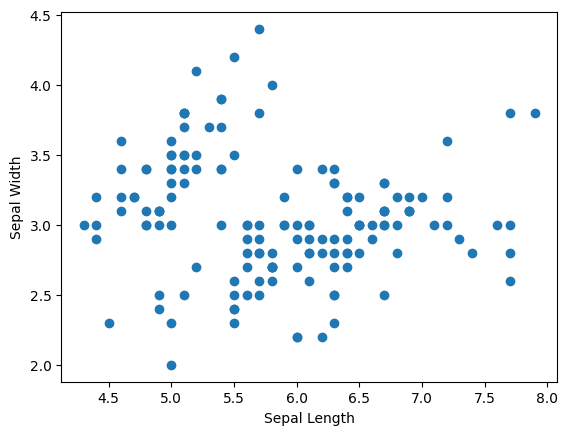

In [ ]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

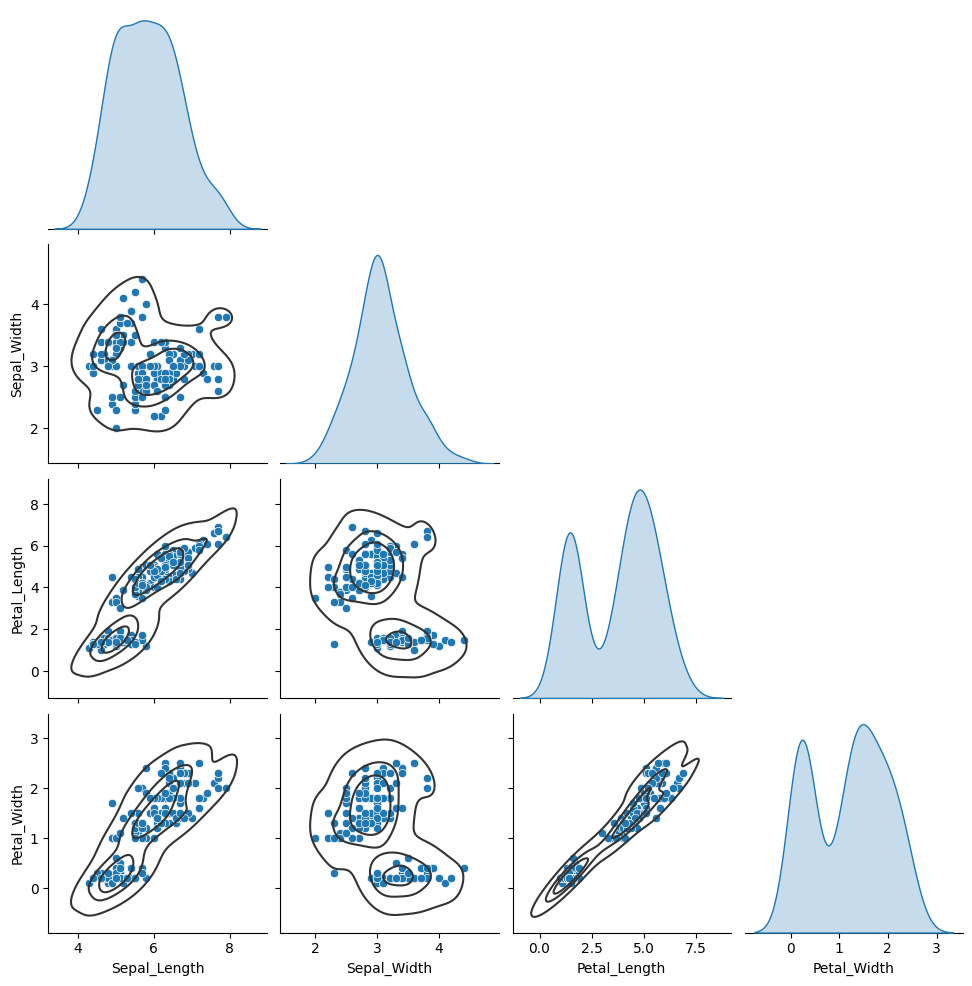

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

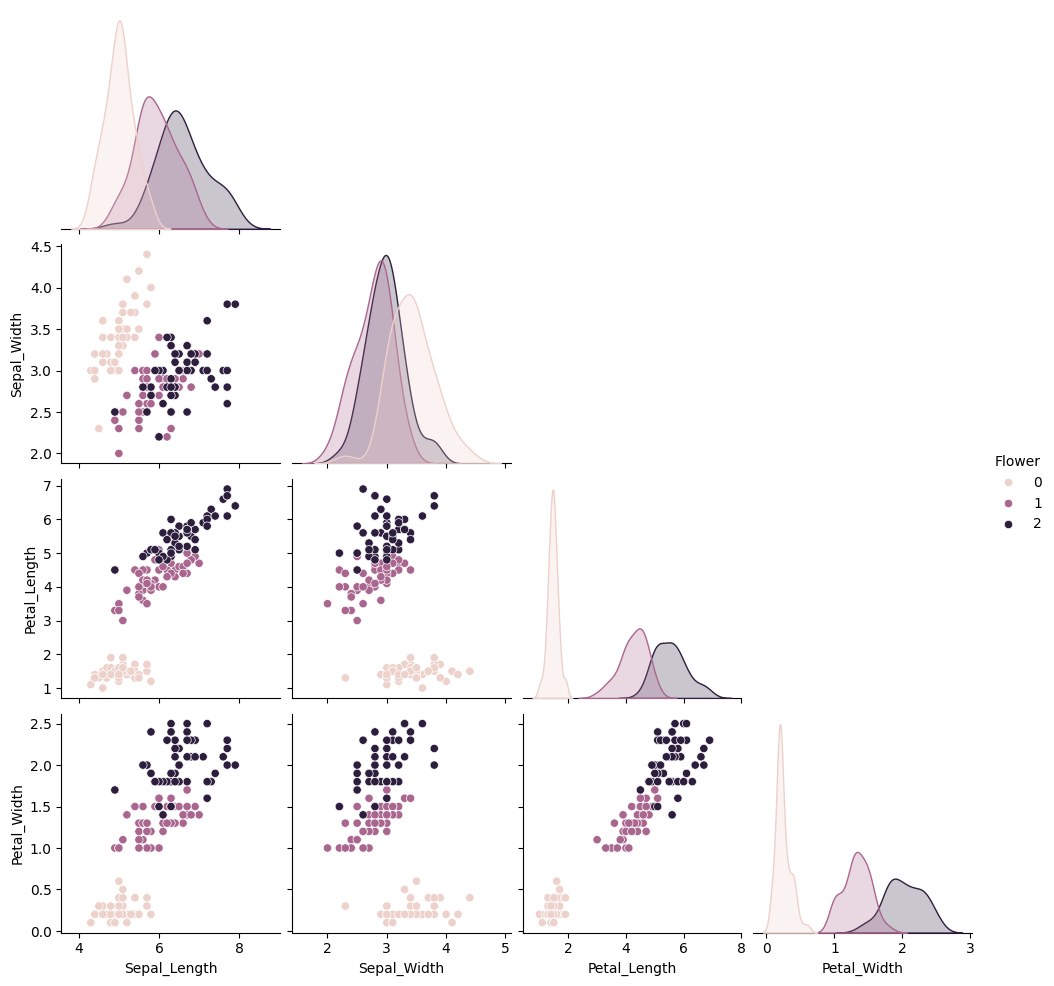

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type) hue='Flower'
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [ ]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

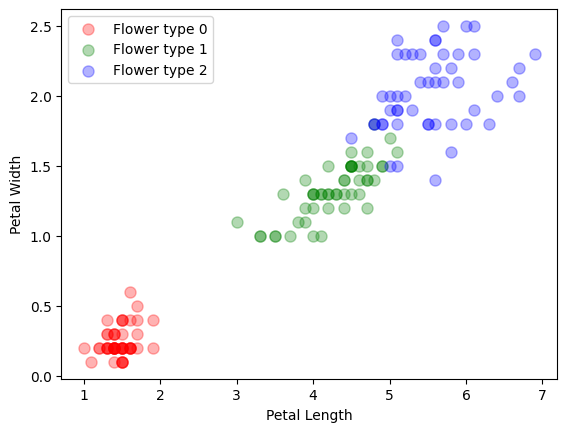

In [ ]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

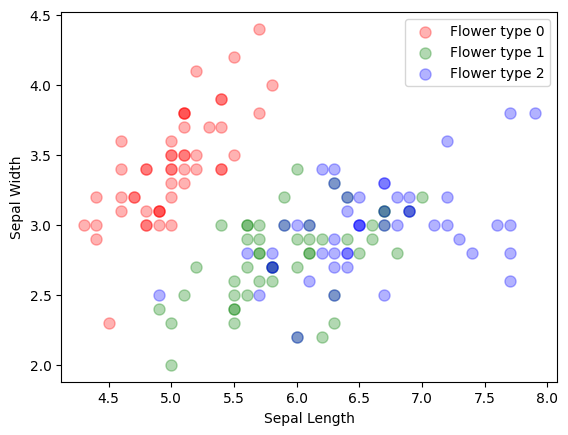

In [ ]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [ ]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [ ]:
# Understand the data X


In [ ]:
# Understand the data y


In [ ]:
# Calculate the number of observations in the dataset



In [ ]:
# Calculate the number of observations for class 0



In [ ]:
# Calculate the number of observations for class 1



In [ ]:
# Calculate the number of observations for class 2



# Train a classifier

## Train the classification model

In [ ]:
X = dataset.drop(columns=["Flower"])
y = dataset["Flower"]

# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression(max_iter=200)

# Fit the model to the training data
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200)

## Predict the class of a new observation

In [ ]:

# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew

Prediction: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Make the prediction using xnew
prediction = classifier.predict(xnew)
# Get the predicted class
print(f"Prediction: {prediction[0]}")

Prediction: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [ ]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split
# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Number of observations in the train set
num_train_samples = X_train.shape[0]
print(f"Number of observations in the train set: {num_train_samples}")


Number of observations in the train set: 120


In [ ]:
# Number of observations of each class in the train set
class_counts_train = np.bincount(y_train)
print(f"Number of observations of each class in the train set: {class_counts_train}")


Number of observations of each class in the train set: [40 41 39]


In [ ]:
# Number of observations in the test set
num_test_samples = X_test.shape[0]
print(f"Number of observations in the test set: {num_test_samples}")

Number of observations in the test set: 30


In [ ]:
# Number of observations of each class in the test set
class_counts_test = np.bincount(y_test)
print(f"Number of observations of each class in the test set: {class_counts_test}")


Number of observations of each class in the test set: [10  9 11]


## Train the classification model

In [ ]:
# Initialize the classifier
classifier = LogisticRegression(max_iter=200)

# Fit the model to the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Test the classification model

In [ ]:
# Make the predictions using the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Explore real and predicted labels
print(f"Real labels: {y_test}")
print(f"Predicted labels: {y_pred}")

Real labels: 73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Flower, dtype: int64
Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Compute the acurracy

In [ ]:
# Define a function to compute accuracy
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [ ]:
# Calculate total accuracy
accuracy_total = accuracy(y_test, y_pred)
print(f"Total accuracy: {accuracy_total}")

Total accuracy: 1.0


In [ ]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy_total = accuracy_score(y_test, y_pred)
print(f"Total accuracy: {accuracy_total}")

Total accuracy: 1.0


In [ ]:
# Compute accuracy for class 0
accuracy_class_0 = accuracy(y_test[y_test == 0], y_pred[y_test == 0])
print(f"Accuracy for class 0: {accuracy_class_0}")

Accuracy for class 0: 1.0


In [ ]:
# Compute accuracy for class 1
accuracy_class_1 = accuracy(y_test[y_test == 1], y_pred[y_test == 1])
print(f"Accuracy for class 1: {accuracy_class_1}")

Accuracy for class 1: 1.0


In [ ]:
# Compute accuracy for class 2
accuracy_class_2 = accuracy(y_test[y_test == 2], y_pred[y_test == 2])
print(f"Accuracy for class 2: {accuracy_class_2}")

Accuracy for class 2: 1.0


## Confussion matrix

In [ ]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

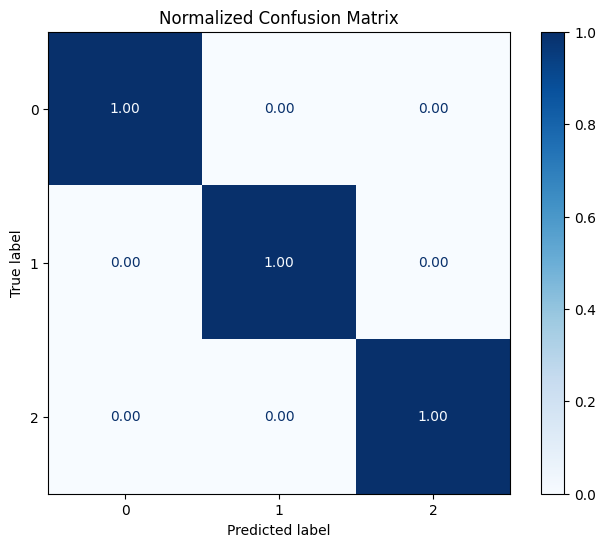

In [ ]:
# Plot normalized confussion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues', values_format='.2f', ax=ax)
plt.title('Normalized Confusion Matrix')
plt.show()

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

data = load_iris()

# Actividad 1
print("RESPUESTA A LA PRIMERA ACTIVIDAD")
# (a) the four variables
classifier_all = LogisticRegression(max_iter=200)
classifier_all.fit(X_train, y_train)
y_pred_all = classifier_all.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all four variables: {accuracy_all:.2f}')

# (b) Las dos variables de Pétalo
X_train_petal = X_train[:, 2:]
X_test_petal = X_test[:, 2:]
classifier_petal = LogisticRegression(max_iter=200)
classifier_petal.fit(X_train_petal, y_train)
y_pred_petal = classifier_petal.predict(X_test_petal)
accuracy_petal = accuracy_score(y_test, y_pred_petal)
print(f'Accuracy with petal variables: {accuracy_petal:.2f}')

# (c) Las dos variables de Sépalos
X_train_sepal = X_train[:, :2]
X_test_sepal = X_test[:, :2]
classifier_sepal = LogisticRegression(max_iter=200)
classifier_sepal.fit(X_train_sepal, y_train)
y_pred_sepal = classifier_sepal.predict(X_test_sepal)
accuracy_sepal = accuracy_score(y_test, y_pred_sepal)
print(f'Accuracy with sepal variables: {accuracy_sepal:.2f}')

# Preguta 2
print("\nRESPUESTAS A LA SEGUNDA PREGUNTA")
# Regresión Logística
classifier_lr = LogisticRegression(max_iter=200)
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy with Logistic Regression: {accuracy_lr:.2f}')

# Árbol de Decisión
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(X_train, y_train)
y_pred_tree = classifier_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy with Decision Tree: {accuracy_tree:.2f}')

RESPUESTA A LA PRIMERA ACTIVIDAD
Accuracy with all four variables: 1.00
Accuracy with petal variables: 1.00
Accuracy with sepal variables: 0.82

RESPUESTAS A LA SEGUNDA PREGUNTA
Accuracy with Logistic Regression: 1.00
Accuracy with Decision Tree: 1.00
